In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv")

In [ ]:
x.head()

,0.07184119218267622,0.8553524138064769,-0.3055966142959303,0.028252569993086545,1.8268953710701943
0,0.139521,-0.423507,0.461059,-0.447400,-0.034988
1,1.626311,-0.257622,-0.697520,1.413219,1.086292
2,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
3,-0.783365,-0.861232,0.951448,-0.117306,0.680597
4,3.077357,0.948615,-0.295527,1.390358,-0.116174


In [ ]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv",
                header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv",
                header=None)

In [ ]:
x.shape, y.shape


((387, 5), (387, 1))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
binary = LinearRegression()

In [ ]:
binary.fit(x[[1]], y)

LinearRegression()

In [ ]:
binary.coef_

array([[95.52010745]])

In [ ]:
binary.predict(x[[1]])

array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

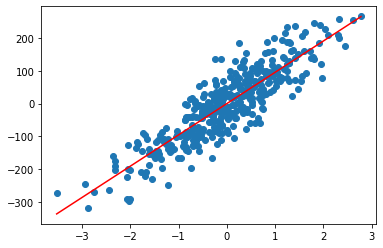

In [ ]:
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [ ]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

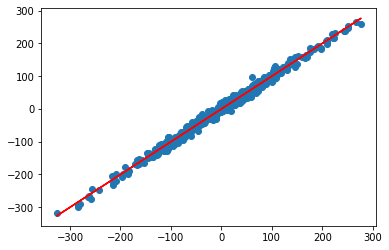

In [ ]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

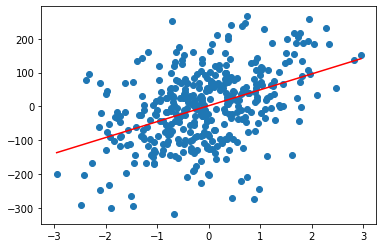

In [ ]:
binary = LinearRegression()
binary.fit(x[[2]], y)
plt.scatter(x[2], y)
xx = np.linspace(x[2].min(), x[2].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

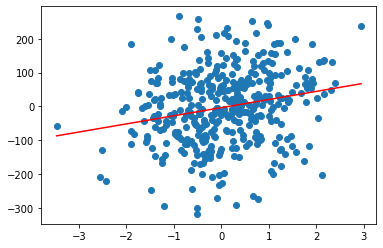

In [ ]:
binary = LinearRegression()
binary.fit(x[[3]], y)
plt.scatter(x[3], y)
xx = np.linspace(x[3].min(), x[3].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

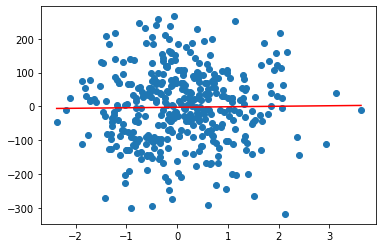

In [ ]:
binary = LinearRegression()
binary.fit(x[[4]], y)
plt.scatter(x[4], y)
xx = np.linspace(x[4].min(), x[4].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

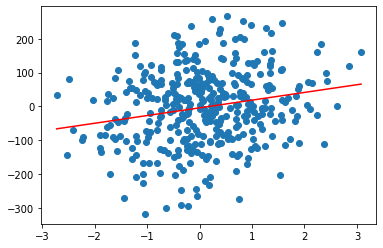

In [ ]:
binary = LinearRegression()
binary.fit(x[[0]], y)
plt.scatter(x[0], y)
xx = np.linspace(x[0].min(), x[0].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def polyFunction(deg, ind, show = False):
  poly = PolynomialFeatures(degree=deg)
  poly_features = poly.fit_transform(x[[ind]].values.reshape(-1, 1))
  binary = LinearRegression()
  binary.fit(poly_features, y)
  if show:
    x_plot = np.linspace(x[ind].min(), x[ind].max(), 100).reshape(-1, 1)
    x_plot_poly = poly.transform(x_plot)
    y_plot = binary.predict(x_plot_poly)
    plt.title(f"Полином {deg} порядка для признака c индексом {ind}")
    plt.scatter(x[ind], y)
    plt.plot(x_plot, y_plot, color="red")
    plt.show()
  return binary.score(poly_features, y)

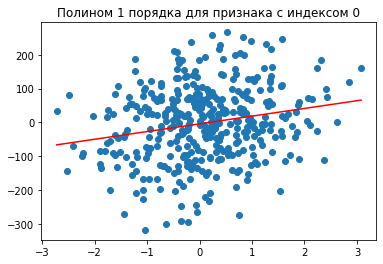

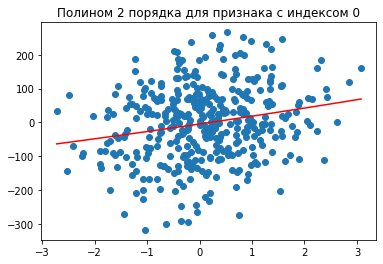

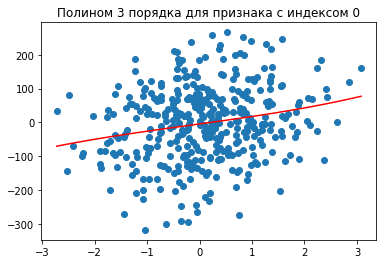

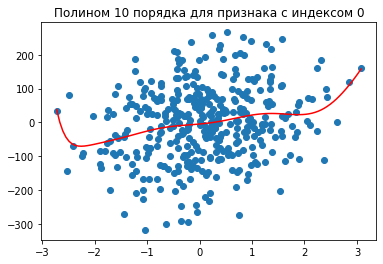

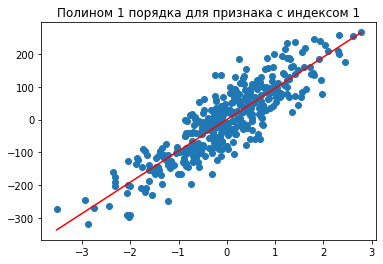

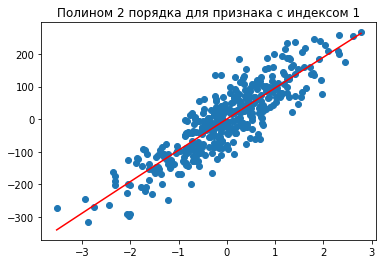

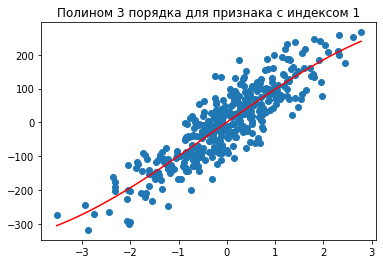

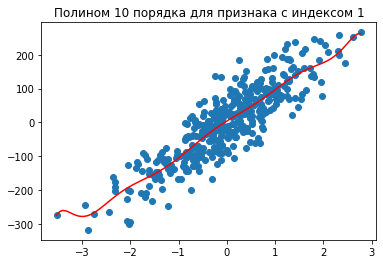

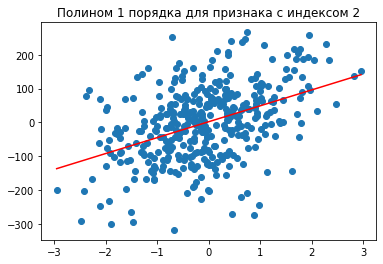

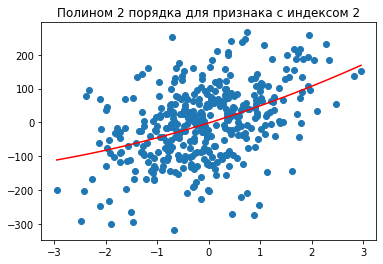

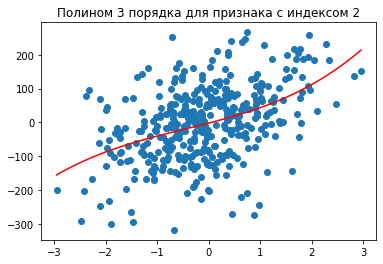

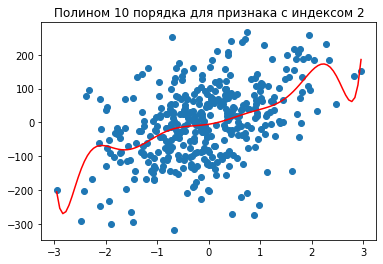

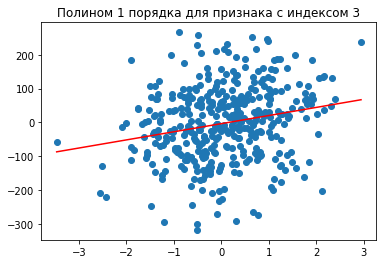

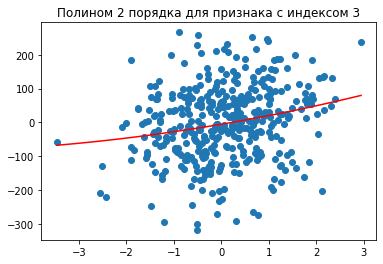

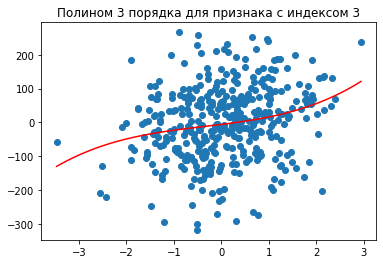

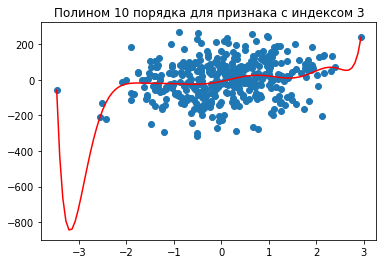

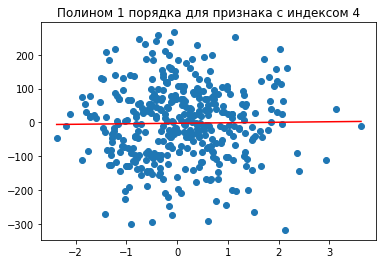

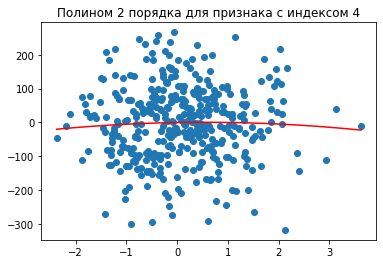

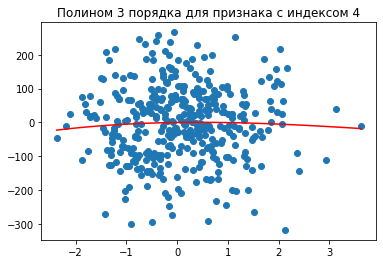

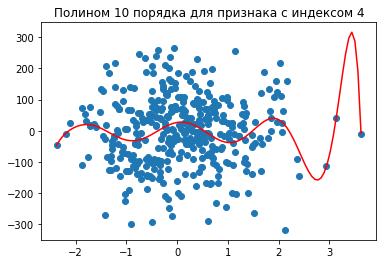

In [ ]:
for i in range(5):
  for j in [1,2,3,10]:
    polyFunction(j, i, show=True)

Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [ ]:
df = pd.DataFrame([[polyFunction(j, i) for i in range(5)] for j in [1,2,3,10]], index = [1,2,3,10])
df

,0,1,2,3,4
1,0.043643,0.769974,0.187945,0.047470,0.000172
2,0.043672,0.769994,0.190008,0.047943,0.001049
3,0.043765,0.771118,0.192802,0.050312,0.001065
10,0.050356,0.772677,0.204409,0.072667,0.045053


Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(x[[1]].values.reshape(-1, 1))
binary = LinearRegression()
binary.fit(poly_features, y)
# Вычисление MAE
y_pred = binary.predict(poly_features)
mae = mean_absolute_error(y, y_pred)
print("MAE: {:.2f}".format(mae))

# Вычисление MSE
mse = mean_squared_error(y, y_pred)
print("MSE: {:.2f}".format(mse))

# Вычисление RMSE
rmse = np.sqrt(mse)
print("RMSE: {:.2f}".format(rmse))

MAE: 42.13
MSE: 2763.91
RMSE: 52.57


(*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

In [ ]:
%timeit polyFunction(2, 1)
%timeit polyFunction(3, 1)
%timeit polyFunction(10, 1)

3.86 ms ± 142 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.99 ms ± 596 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.59 ms ± 865 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
